# Model Evaluation & Deployment Check

This notebook evaluates the final Stacking Ensemble model and verifies it is ready for deployment.

## Objectives:
- Load the final `best_model.pkl`
- Evaluate on the held-out Test Set
- Generate Confusion Matrix and ROC Curve
- Verify model persistence for API

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, roc_curve
import os

# Set plots style
plt.style.use('seaborn-v0_8-whitegrid')

## 1. Load Data and Model

In [2]:
# Load test data
X_test = pd.read_csv('../data/processed/X_test.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

print(f"Test Set Shape: {X_test.shape}")

# Load best model
model_path = '../models/best_model.pkl'
if os.path.exists(model_path):
    model = joblib.load(model_path)
    print(f"✓ Loaded model from {model_path}")
    print(f"  Type: {type(model).__name__}")
else:
    print(f"❌ Model not found at {model_path}")

Test Set Shape: (482, 39)
✓ Loaded model from ../models/best_model.pkl
  Type: XGBClassifier


## 2. Model Performance on Test Set

In [3]:
# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Metrics
roc_auc = roc_auc_score(y_test, y_prob)
print(f"Test ROC-AUC: {roc_auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Test ROC-AUC: 0.7496

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.63      0.71       279
           1       0.61      0.78      0.68       203

    accuracy                           0.70       482
   macro avg       0.70      0.71      0.69       482
weighted avg       0.72      0.70      0.70       482



## 3. Visualizations

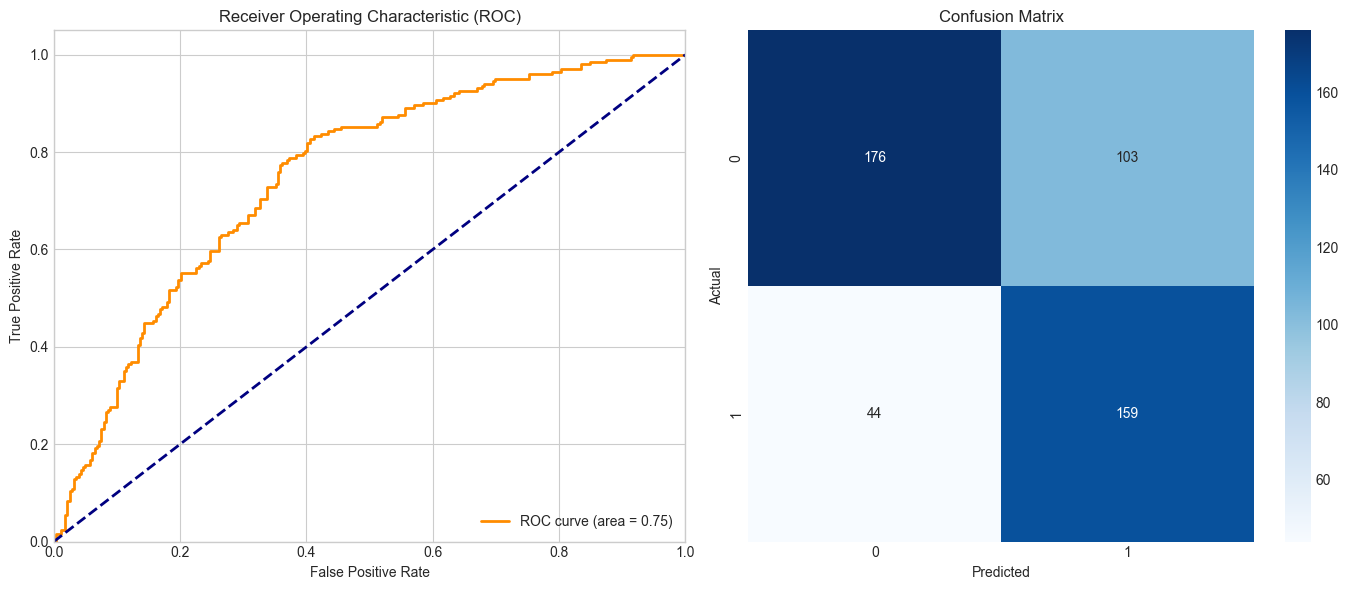

✓ Visualizations saved to visualizations/model_evaluation.png


In [4]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
axes[0].plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
axes[0].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
axes[0].set_xlim([0.0, 1.0])
axes[0].set_ylim([0.0, 1.05])
axes[0].set_xlabel('False Positive Rate')
axes[0].set_ylabel('True Positive Rate')
axes[0].set_title('Receiver Operating Characteristic (ROC)')
axes[0].legend(loc="lower right")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('../visualizations/model_evaluation.png')
plt.show()

print("✓ Visualizations saved to visualizations/model_evaluation.png")